In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## K-means discretization with Scikit-Learn

In [4]:
# set up a k-means discretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

# fit the discretizer to the train set so that it learns the 
# interval boundaries
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [5]:
# we can inspect the bin boundaries here:

disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.03266667, 15.46755102,
       18.89709647, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
       36.98      ]),
       array([ 1.1742    ,  2.26301884,  3.30153104,  4.48057886,  5.60712611,
        6.6482802 ,  7.56131797,  8.45406587,  9.7820881 , 11.37686667,
       12.1265    ]),
       array([3.561     , 3.987125  , 4.73948864, 5.32155682, 5.77190824,
       6.14016449, 6.50284566, 6.91447956, 7.43717157, 8.1095049 ,
       8.78      ])], dtype=object)

In [6]:
# let's transform the train set, remember that it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

print(train_t.head())

   LSTAT  DIS   RM
0    9.0  0.0  2.0
1    1.0  2.0  6.0
2    4.0  0.0  5.0
3    0.0  6.0  5.0
4    4.0  0.0  4.0


In [7]:
# let's do the same for the test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

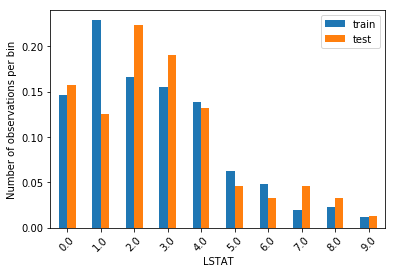

In [8]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

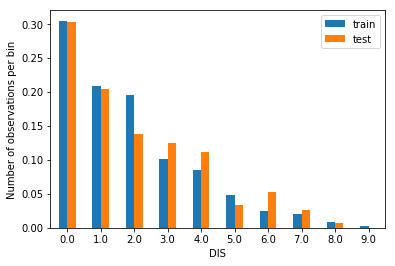

In [9]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

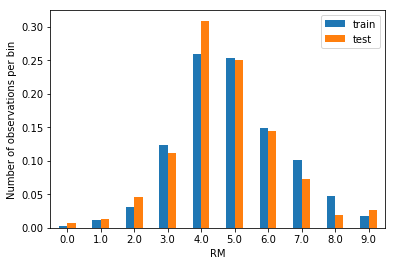

In [10]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')